<a href="https://colab.research.google.com/github/daiyan71/Assignment1/blob/master/170104144_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dataset 1.csv',encoding= 'ISO-8859-1',low_memory=False)


In [5]:
df.head()

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
df = df.sample(frac = 1)

from sklearn.model_selection import train_test_split
message = df['message'].values
label = df['label'].values
message_train, message_test, label_train, label_test = train_test_split(message, label, test_size=0.2, random_state=1000) 

In [9]:
 from keras.preprocessing.text import Tokenizer
 tokenizer = Tokenizer(num_words = 150, oov_token = "<unk>", filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
 tokenizer.fit_on_texts(message_train)
 Xcnn_train = tokenizer.texts_to_sequences(message_train)
 Xcnn_test = tokenizer.texts_to_sequences(message_test)
 vocab_size = len(tokenizer.word_index) 
 print(message_train[1])
 print(Xcnn_train[1]) 

loves fifth street and sabets ng sabets with nai.  http://plurk.com/p/x6j1y
[1, 1, 1, 6, 1, 1, 1, 16, 1, 27, 1, 20, 1, 1]


In [10]:
 from keras.preprocessing.sequence import pad_sequences
 maxlen = 150
 Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
 Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
 print(Xcnn_train[1, :]) 

[ 1  1  1  6  1  1  1 16  1 27  1 20  1  1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]


In [11]:
from keras.models import Sequential
from keras import layers 
import tensorflow as tf

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 200)          3950000   
_________________________________________________________________
conv1d (Conv1D)              (None, 149, 128)          51328     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 64)            24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 36, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 33, 32)            8224      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0

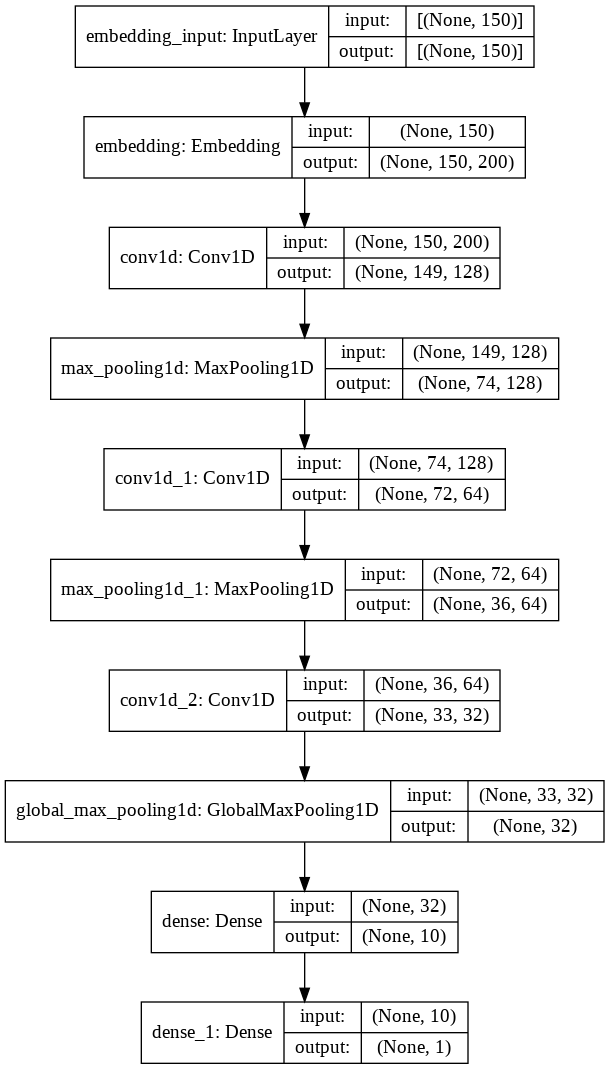

In [12]:
 embedding_dim = 200
 textcnnmodel = Sequential()
 textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
 textcnnmodel.add(layers.Conv1D(filters=128, kernel_size=2, activation='relu'))
 textcnnmodel.add(layers.MaxPooling1D(pool_size = 2))
 textcnnmodel.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
 textcnnmodel.add(layers.MaxPooling1D(pool_size = 2))
 textcnnmodel.add(layers.Conv1D(filters=32, kernel_size=4, activation='relu'))
 textcnnmodel.add(layers.GlobalMaxPooling1D())
 textcnnmodel.add(layers.Dense(10, activation='relu'))
 textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
 textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
 textcnnmodel.summary() 

 tf.keras.utils.plot_model(textcnnmodel, show_shapes = True, show_layer_names = True)

In [13]:
 history = textcnnmodel.fit(Xcnn_train, label_train,
                     epochs=10,
                     verbose=True,
                     validation_data=(Xcnn_test, label_test),
                     batch_size=10)
 loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
 print("Training Accuracy: {:.4f}".format(accuracy))
 loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
 print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Epoch 1/10
826/826 [==============================] - 52s 62ms/step - loss: 0.1101 - accuracy: 0.9590 - val_loss: 0.0519 - val_accuracy: 0.9918
Epoch 2/10
826/826 [==============================] - 50s 61ms/step - loss: 0.0276 - accuracy: 0.9942 - val_loss: 0.0335 - val_accuracy: 0.9932
Epoch 3/10
826/826 [==============================] - 51s 61ms/step - loss: 0.0209 - accuracy: 0.9948 - val_loss: 0.0522 - val_accuracy: 0.9932
Epoch 4/10
826/826 [==============================] - 51s 62ms/step - loss: 0.0163 - accuracy: 0.9961 - val_loss: 0.0359 - val_accuracy: 0.9903
Epoch 5/10
826/826 [==============================] - 51s 61ms/step - loss: 0.0172 - accuracy: 0.9958 - val_loss: 0.0530 - val_accuracy: 0.9932
Epoch 6/10
826/826 [==============================] - 51s 61ms/step - loss: 0.0145 - accuracy: 0.9966 - val_loss: 0.0457 - val_accuracy: 0.9932
Epoch 7/10
826/826 [==============================] - 51s 61ms/step - loss: 0.0142 - accuracy: 0.9966 - val_loss: 0.0550 - val_accuracy:

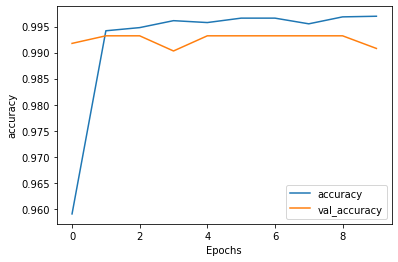

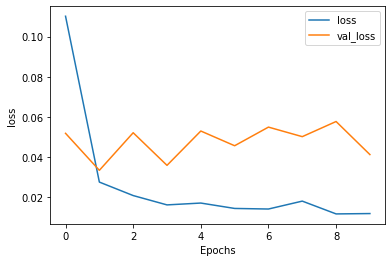

In [14]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

y_pred = textcnnmodel.predict(Xcnn_train)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose = 1)




258/258 [==============================] - 4s 15ms/step - loss: 0.0106 - accuracy: 0.9970


In [16]:
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(label_train, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(label_train, y_pred))
print('Train Recall:', recall_score(label_train, y_pred))
print('Train F1-score:', f1_score(label_train, y_pred))

Train Loss: 0.010647378861904144
Train Accuracy: 0.9969700574874878 (Model Metric)
Train Accuracy: 0.9969700642346382 (sklearn Metric)
Train Precision: 0.9945325314379442
Train Recall: 0.9918211559432933
Train F1-score: 0.9931749931749931


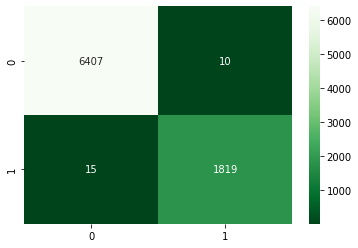

In [17]:
sns.heatmap(confusion_matrix(label_train, y_pred), annot = True, fmt = 'g', cmap='Greens_r')

In [18]:
y_pred = textcnnmodel.predict(Xcnn_test)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

Test Accuracy: 0.9907901114881241 (sklearn Metric)


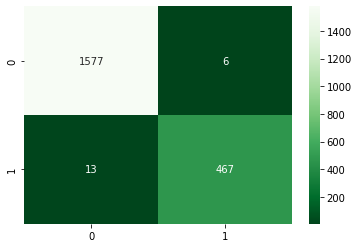

In [19]:
print('Test Accuracy:', accuracy_score(label_test, y_pred), '(sklearn Metric)')
sns.heatmap(confusion_matrix(label_test, y_pred), annot = True, fmt = 'g', cmap='Greens_r')